In [107]:
import act
from tempfile import TemporaryDirectory
import glob
import numpy as np
import pandas as pd
import datetime as dt
import altair as alt

In [54]:
username = os.getenv("ARM_USERNAME")
token = os.getenv("ARM_TOKEN")
radiosonde ='gucsondewnpnM1.b1'
DATE_FORMAT_STR = '%Y-%m-%d'
start_date = dt.datetime.strptime("2023-01-01", DATE_FORMAT_STR)
end_date = dt.datetime.today()

pressure_value = 600
pressure_variation = 10
date_list = [start_date + dt.timedelta(days=i) for i in range(0,(end_date - start_date).days)]

In [55]:
df = pd.DataFrame()
with TemporaryDirectory() as temp_dir:
    for date in date_list:
        date_str = dt.datetime.strftime(date, DATE_FORMAT_STR)
        act.discovery.download_data(
            username,    token,    radiosonde,    date_str, date_str, output = temp_dir)
        sonde_ds = act.io.armfiles.read_netcdf(glob.glob(os.path.join(temp_dir, '*.cdf')))
        sonde_df = sonde_ds.to_dataframe()
        sonde_df = sonde_df[np.abs(sonde_df['pres'] - 600) < 10]
        df = pd.concat([df, sonde_df])

[DOWNLOADING] gucsondewnpnM1.b1.20230101.113000.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230101.232600.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230102.112600.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230102.234400.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230103.113100.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230103.232800.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230104.113800.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230104.232200.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230105.112500.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230105.232900.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230106.113300.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230106.233000.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230107.113700.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230107.232700.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230108.113700.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230108.233000.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230109.140200.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230109.232900.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20230110.113200.cdf
[DOWNLOADING

In [57]:
import seaborn as sns

In [65]:
[col for col in df.columns if not col.startswith('qc')]

['base_time',
 'time_offset',
 'pres',
 'tdry',
 'dp',
 'wspd',
 'deg',
 'rh',
 'u_wind',
 'v_wind',
 'wstat',
 'asc',
 'lat',
 'lon',
 'alt']

/tmp/ipykernel_5946/267640106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['wspd'])


<AxesSubplot: xlabel='wspd', ylabel='Density'>

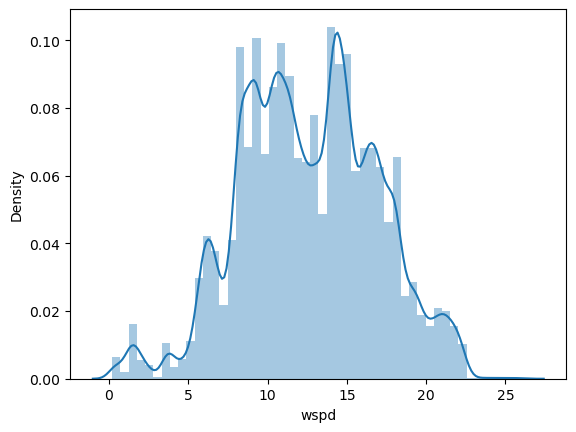

In [60]:
sns.distplot(df['wspd'])

In [69]:
import altair as alt

In [100]:
df = df.reset_index()

In [105]:
df['time_hour_rounded'] = pd.Series(pd.to_datetime(df.reset_index()['time'].apply(lambda dt: dt.replace(minute = 0, second = 0, microsecond = 0))))

In [120]:
daily2_df = df.groupby(["time_hour_rounded"]).mean().reset_index()

/tmp/ipykernel_5946/968197518.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily2_df = df.groupby(["time_hour_rounded"]).mean().reset_index()


In [121]:
daily2_df

,time_hour_rounded,pres,qc_pres,tdry,qc_tdry,dp,qc_dp,wspd,qc_wspd,deg,...,u_wind,qc_u_wind,v_wind,qc_v_wind,wstat,asc,qc_asc,lat,lon,alt
0,2023-01-01 11:00:00,598.140808,0.0,-10.143846,0.0,-10.346539,0.0,17.557692,0.0,240.846161,...,15.216018,0.0,8.707304,0.0,NaN,10.338462,0.0,38.966187,-106.981010,4236.604004
1,2023-01-01 23:00:00,600.092590,0.0,-10.361522,0.0,-10.820652,0.0,12.700000,0.0,177.000000,...,-0.555927,0.0,12.596627,0.0,NaN,5.610869,0.0,38.976231,-106.999413,4188.515137
2,2023-01-02 11:00:00,599.775513,0.0,-13.077552,0.0,-13.910000,0.0,14.551021,0.0,168.816330,...,-2.832650,0.0,14.268759,0.0,NaN,5.193878,0.0,38.980118,-106.999458,4135.922363
3,2023-01-02 23:00:00,600.276245,0.0,-15.542750,0.0,-19.006500,0.0,8.537500,0.0,286.000000,...,8.204646,0.0,-2.357724,0.0,NaN,6.355000,0.0,38.954865,-106.981163,4122.075195
4,2023-01-03 11:00:00,600.104614,0.0,-17.265800,0.0,-17.961199,0.0,9.738000,0.0,275.899994,...,9.686067,0.0,-1.000146,0.0,NaN,5.032000,0.0,38.958958,-106.978371,4133.194336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023-02-19 11:00:00,599.723267,0.0,-16.584349,0.0,-17.122608,0.0,15.200000,0.0,260.456512,...,14.978865,0.0,2.532846,0.0,NaN,5.419565,0.0,38.962467,-106.967087,4221.993652
98,2023-02-19 23:00:00,598.484680,0.0,-15.677813,0.0,-20.946718,0.0,20.332813,0.0,283.078125,...,19.662546,0.0,-4.840532,0.0,NaN,4.021875,0.0,38.955463,-106.977913,4246.537598
99,2023-02-20 11:00:00,600.357666,0.0,-13.511458,0.0,-17.396873,0.0,20.929167,0.0,266.312500,...,20.882809,0.0,1.294401,0.0,NaN,5.318750,0.0,38.957996,-106.976669,4245.420898
100,2023-02-20 23:00:00,599.903503,0.0,-12.056111,0.0,-12.322408,0.0,15.848147,0.0,277.000000,...,15.722008,0.0,-1.936332,0.0,NaN,4.785185,0.0,38.959091,-106.974884,4262.492676


In [126]:
alt.Chart(daily2_df.reset_index()).mark_bar().encode(
    alt.X('time_hour_rounded:T'),
    alt.Y("wspd:Q")
)

alt.Chart(...)